In [2]:
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import scipy.optimize as optimize

In [111]:
# RADIUS = (0.091 * 107.47 / 60.01) / 2
RADIUS = 8.5 * 10**-2
RADIUS_ERR = 0.01 / 100
N = 320
MU = 4 * np.pi * 10**-7
E = 1.60217662 * 10**-19
M = 9.10938356 * 10**-31

In [12]:
def B(I):
    return (8 * MU * N * I) / (np.sqrt(125) * RADIUS)

In [83]:
#LOW FREQUENCY
current = np.array([0.405, 0.2902, 0.260, 0.288, 0.359])
frequency = np.array([33.71, 25, 21.03, 23.13, 28.54]) * 10**6
frequency_err = np.array([0.34, 0.34, 0.34, 0.34, 0.34]) * 10**6
current_err = np.array([i * 0.02 for i in current])
current_err += 0.00825

In [96]:
x = np.array([B(i) for i in current])
x_err = np.array([np.sqrt((B(x[i]) * RADIUS_ERR / RADIUS)**2 + (B(x[i]) / x[i] * current_err[i])**2) for i in range(len(current))])
x = x / 2 / np.pi
y = frequency
y_err = frequency_err

In [ ]:
def linear_f(x, m, b):
    return m * x + b

In [15]:
plt.style.use('science')
plt.rcParams['figure.dpi']=220

In [97]:
param, cov = optimize.curve_fit(linear_f, x, y)
m_err = np.sqrt(cov[0][0])
b_err = np.sqrt(cov[1][1])

chi_2 = np.sum(((y - linear_f(frequency, *param)) / y_err) ** 2)
reduced_chi_2 = chi_2 / (len(frequency) - 2)

y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean) ** 2)  # Total sum of squares
ss_res = np.sum((y - (param[0] * x + param[1])) ** 2)  # Residual sum of squares
r_squared = 1 - (ss_res / ss_tot)  # Coefficient of determination

param, m_err, b_err, chi_2, reduced_chi_2, r_squared

/var/folders/d2/jqp6s4g127sc72bbvlgt80kw0000gn/T/ipykernel_49527/411166330.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  param, cov = optimize.curve_fit(linear_f, x, y)


(array([1.0000e+00, 2.6282e+07]),
 inf,
 inf,
 29876.449999590564,
 9958.816666530189,
 1.3266610032758308e-11)

In [99]:
x_err

array([0.00031992, 0.00031182, 0.00030968, 0.00031166, 0.00031668])

In [98]:
param[0] / (E / (2*M))

1.137126012986009e-11

<>:22: SyntaxWarning: invalid escape sequence '\g'
<>:22: SyntaxWarning: invalid escape sequence '\g'
/var/folders/d2/jqp6s4g127sc72bbvlgt80kw0000gn/T/ipykernel_49527/3332480395.py:22: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(B_values, slope * B_values + intercept, 'r-', label=f'Fit: $\gamma$ = {slope:.2e} Hz/T')


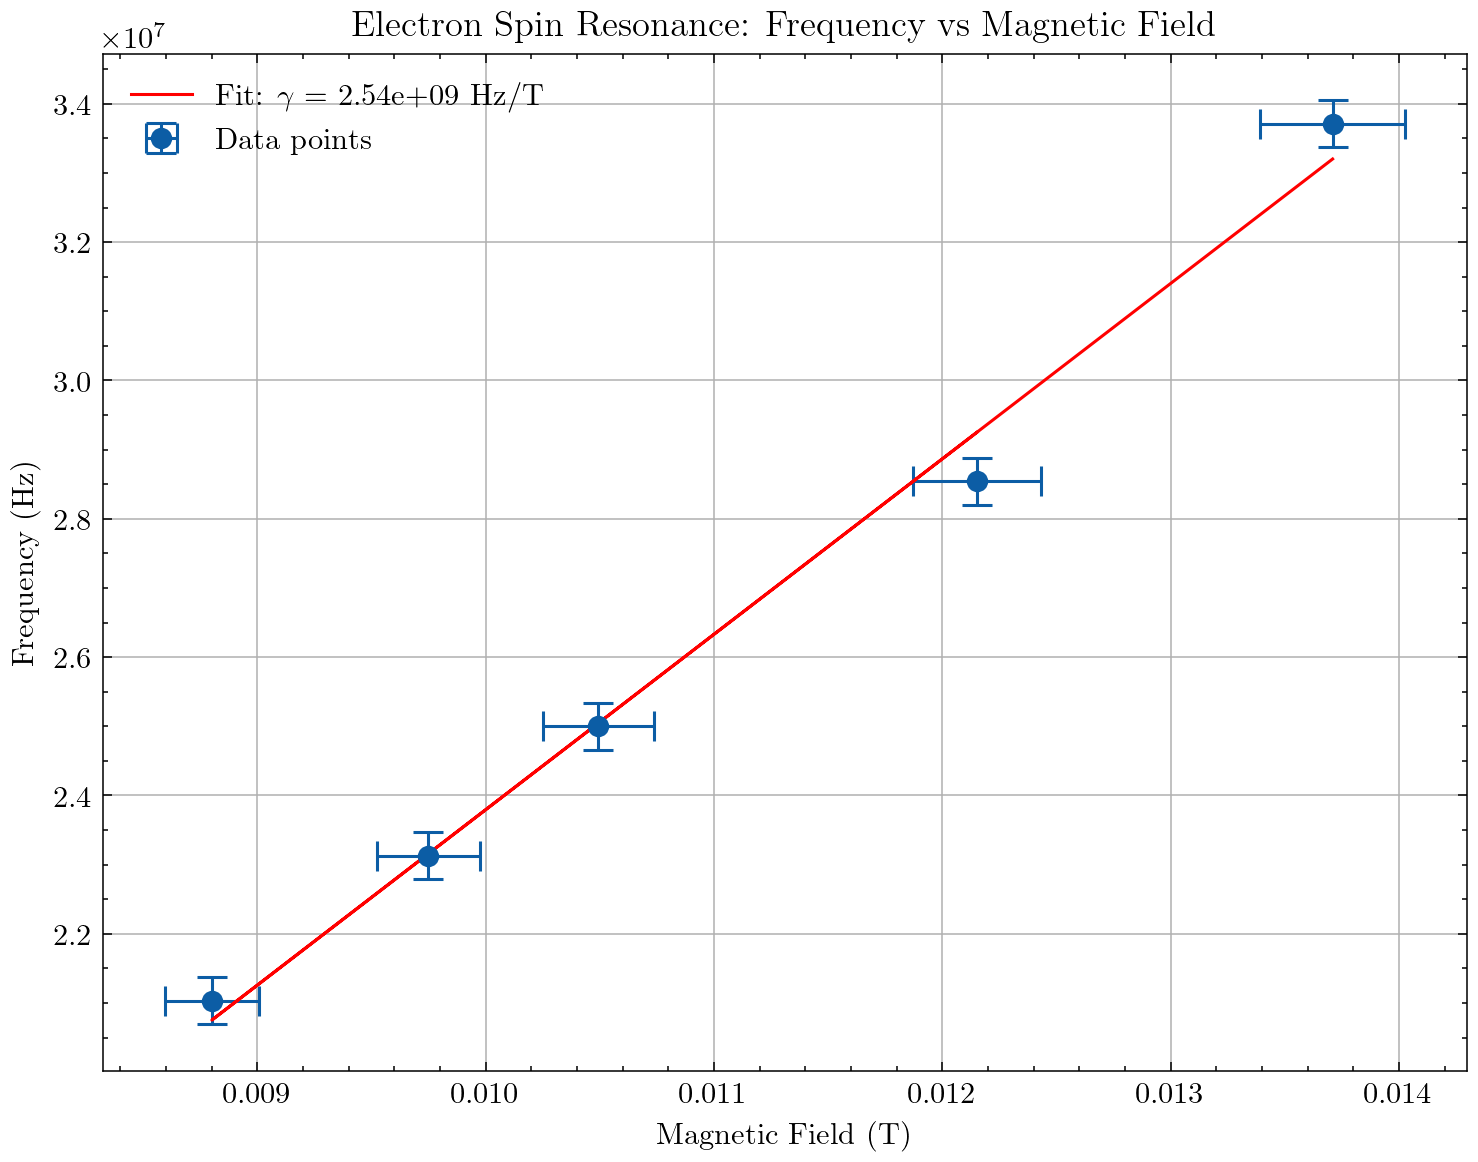

2536434807.779878

In [108]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Given data
current = np.array([0.405, 0.31, 0.260, 0.288, 0.359])
frequency = np.array([33.71, 25, 21.03, 23.13, 28.54]) * 10**6
frequency_err = np.array([0.34, 0.34, 0.34, 0.34, 0.34]) * 10**6
current_err = np.array([i * 0.02 for i in current])

# Calculate the magnetic field for each current
B_values = ((4/5) ** (3/2)) * (MU * N * current / RADIUS)

B_err = np.sqrt((B_values * RADIUS_ERR / RADIUS)**2 + (B_values / current * current_err)**2)

# Perform a linear regression to find the slope (which is the gyromagnetic ratio γ)
slope, intercept, r_value, p_value, std_err = linregress(B_values, frequency)

# Plot the data
plt.figure(figsize=(8,6))
plt.errorbar(B_values, frequency, xerr=(B_err), yerr=frequency_err, 
             fmt='o', label='Data points', capsize=5)
plt.plot(B_values, slope * B_values + intercept, 'r-', label=f'Fit: $\gamma$ = {slope:.2e} Hz/T')

# Labels and title
plt.xlabel("Magnetic Field (T)")
plt.ylabel("Frequency (Hz)")
plt.title("Electron Spin Resonance: Frequency vs Magnetic Field")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Output the gyromagnetic ratio value
slope

In [109]:
slope / (E / (2*M))

0.028842460001696667

<>:26: SyntaxWarning: invalid escape sequence '\g'
<>:26: SyntaxWarning: invalid escape sequence '\g'
/var/folders/d2/jqp6s4g127sc72bbvlgt80kw0000gn/T/ipykernel_49527/1729400088.py:26: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(B_values, slope * B_values + intercept, 'r-', label=f'Fit: $\gamma$ = {slope:.2e} Hz/T')


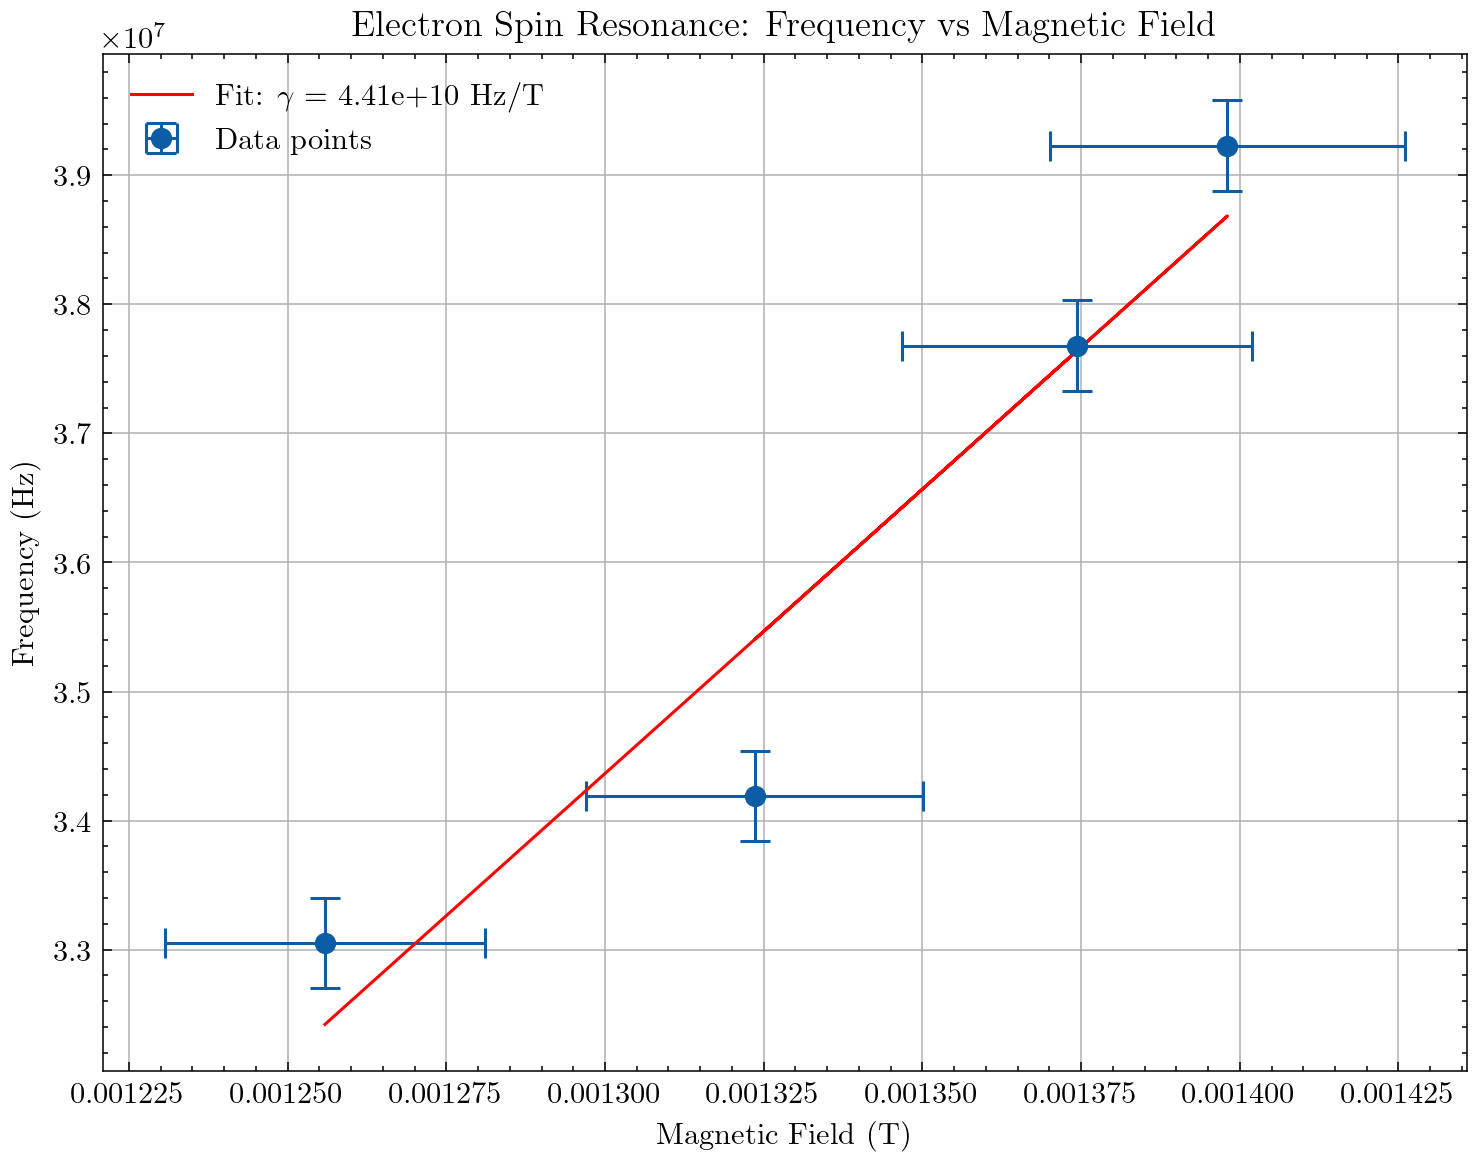

44057794174.01426

In [116]:
# Given data
# Define the current and frequency arrays
current = np.array([0.406, 0.391, 0.413, 0.371])  # Current in A
frequency = np.array([37.68, 34.19, 39.23, 33.05]) * 10**6  # Frequency in Hz

# Define uncertainties
current_err = 0.02 * current  # 20% uncertainty in current
frequency_err = np.full_like(frequency, 0.35 * 10**6)  # Constant frequency uncertainty of 0.35 MHz

# Display the arrays
current, frequency, current_err, frequency_err


# Calculate the magnetic field for each current
B_values = ((4/5) ** (3/2)) * (MU * N * current / RADIUS)

B_err = np.sqrt((B_values * RADIUS_ERR / RADIUS)**2 + (B_values / current * current_err)**2)

# Perform a linear regression to find the slope (which is the gyromagnetic ratio γ)
slope, intercept, r_value, p_value, std_err = linregress(B_values, frequency)

# Plot the data
plt.figure(figsize=(8,6))
plt.errorbar(B_values, frequency, xerr=(B_err), yerr=frequency_err, 
             fmt='o', label='Data points', capsize=5)
plt.plot(B_values, slope * B_values + intercept, 'r-', label=f'Fit: $\gamma$ = {slope:.2e} Hz/T')

# Labels and title
plt.xlabel("Magnetic Field (T)")
plt.ylabel("Frequency (Hz)")
plt.title("Electron Spin Resonance: Frequency vs Magnetic Field")
plt.legend()
plt.grid()

# Show the plot
plt.show()

# Output the gyromagnetic ratio value
slope

In [117]:
slope / (E / (2*M))

0.5009926383005505